In [134]:
import pandas as pd

# Load JSON data into a DataFrame
df = pd.read_json('primate_dataset.json')

# Convert DataFrame to CSV
df.to_csv('df.csv', index=False)

In [135]:
df.head()

post_title  \
0                     I don't feel original anymore.   
1  I don’t have anyone to talk to and I don’t kno...   
2    Stuck between moving forward and killing myself   
3          I need help on how to help my girlfriend.   
4           I've been feeling this way for some tine   

                                           post_text  \
0  When I was in high school a few years back, I ...   
1  Nine years ago I was diagnosed with depression...   
2  Some background information: My GF of almost 3...   
3  My girlfriend ,of about 3 months now ,has been...   
4  I'm alway feeling like this. It doesn't even m...   

                                         annotations  
0  [[Feeling-bad-about-yourself-or-that-you-are-a...  
1  [[Feeling-bad-about-yourself-or-that-you-are-a...  
2  [[Feeling-bad-about-yourself-or-that-you-are-a...  
3  [[Feeling-bad-about-yourself-or-that-you-are-a...  
4  [[Feeling-bad-about-yourself-or-that-you-are-a...

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2003 entries, 0 to 2002
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   post_title   2003 non-null   object
 1   post_text    2003 non-null   object
 2   annotations  2003 non-null   object
dtypes: object(3)
memory usage: 62.6+ KB


In [137]:
df.shape

(2003, 3)

In [138]:
df.describe(include=['O']).T # to include categorical columns

count unique                                                top  \
post_title   2003   1973                                        I need help   
post_text    2003   2002  It's not about not being able to afford stuff ...   
annotations  2003    238  [[Feeling-bad-about-yourself-or-that-you-are-a...   

            freq  
post_title    10  
post_text      2  
annotations  146

In [139]:
df.isna().sum() #total count of missing values in columns

post_title     0
post_text      0
annotations    0
dtype: int64

In [140]:
df = df.applymap(str)

DataFrame.applymap has been deprecated. Use DataFrame.map instead.


In [141]:
print("Unique values per column:")
df.nunique()  #unique values in columns of dataframe

Unique values per column:


post_title     1973
post_text      2002
annotations     238
dtype: int64

EXPLORATORY DATA ANALYSIS

Word cloud for column 'post_title':


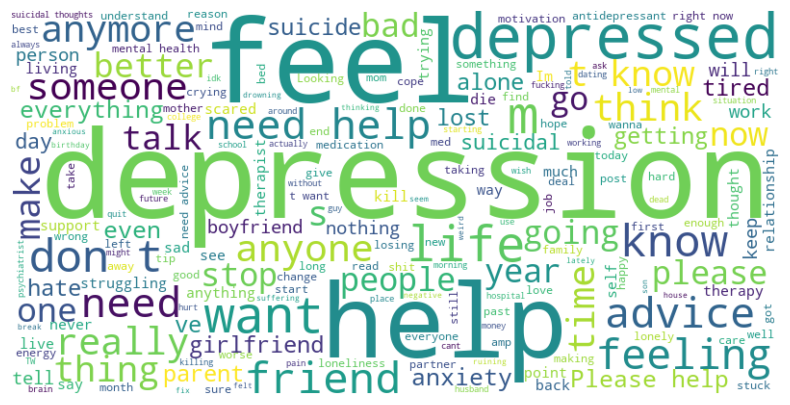

Word cloud for column 'post_text':


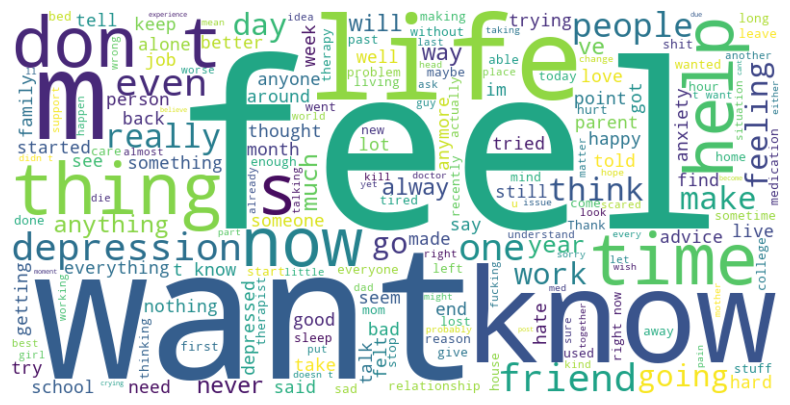

Word cloud for column 'annotations':


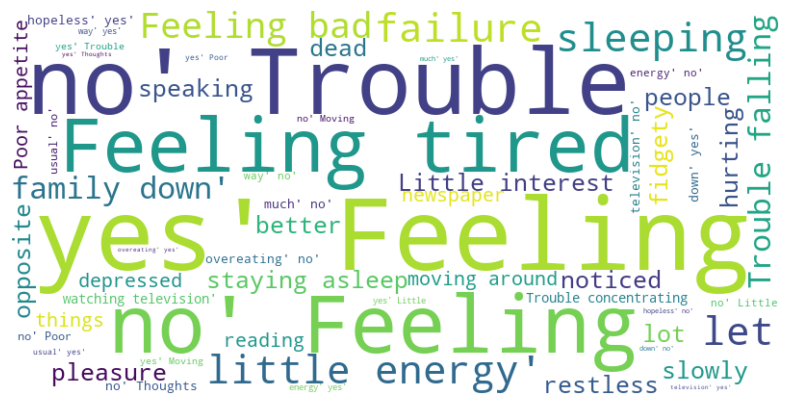

In [142]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a column
def generate_word_cloud(column_data):
    # Combine all strings into one
    combined_text = ' '.join(column_data)
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud for each column
for column in df.columns:
    print(f"Word cloud for column '{column}':")
    generate_word_cloud(df[column])


In [143]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Manushree
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

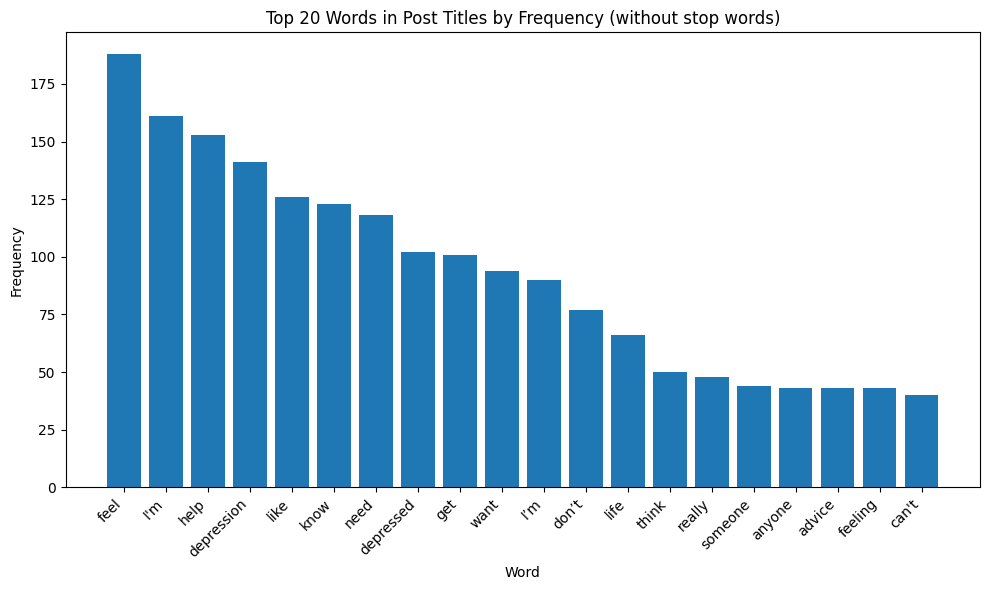

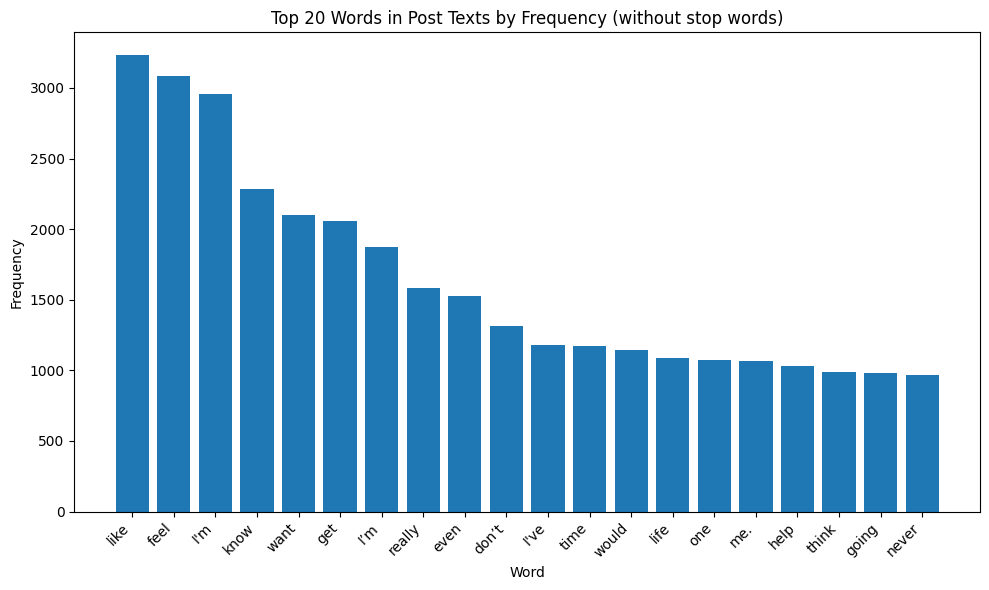

In [144]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Function to tokenize text and count word frequency, removing stop words
stop_words = set(stopwords.words('english'))
def count_word_frequency(text):
    # Tokenize text and remove stop words
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    # Count word frequency
    word_counts = Counter(words)
    return word_counts

# Apply count_word_frequency function to 'post_title' column
df['title_word_counts'] = df['post_title'].apply(count_word_frequency)

# Apply count_word_frequency function to 'post_text' column
df['text_word_counts'] = df['post_text'].apply(count_word_frequency)

# Plot word frequency for 'post_title'
plt.figure(figsize=(10, 6))
title_word_counts = df['title_word_counts'].sum()
title_word_counts_df = pd.DataFrame.from_dict(title_word_counts, orient='index').reset_index()
title_word_counts_df.columns = ['Word', 'Frequency']
title_word_counts_df = title_word_counts_df.sort_values(by='Frequency', ascending=False)
plt.bar(title_word_counts_df['Word'][:20], title_word_counts_df['Frequency'][:20])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Post Titles by Frequency (without stop words)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot word frequency for 'post_text'
plt.figure(figsize=(10, 6))
text_word_counts = df['text_word_counts'].sum()
text_word_counts_df = pd.DataFrame.from_dict(text_word_counts, orient='index').reset_index()
text_word_counts_df.columns = ['Word', 'Frequency']
text_word_counts_df = text_word_counts_df.sort_values(by='Frequency', ascending=False)
plt.bar(text_word_counts_df['Word'][:20], text_word_counts_df['Frequency'][:20])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Post Texts by Frequency (without stop words)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [145]:
# Drop columns
columns_to_drop = ['title_word_counts','text_word_counts']
df.drop(columns_to_drop, axis=1, inplace=True)

In [146]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to C:\Users\Manushree
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [147]:
import transformers
from transformers import (AutoTokenizer,
                          AutoModelForSequenceClassification,
                          TextClassificationPipeline)

import joblib
from tqdm import tqdm

import contractions
import shap
%matplotlib inline

import re
import string
from wordcloud import WordCloud

from textblob import TextBlob

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import word2vec

from collections import Counter
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline

In [148]:
only_english=set(nltk.corpus.words.words())
def clean_text(post_text):

    sample=post_text
    sample=" ".join([x.lower() for x in sample.split()])
    sample=re.sub(r"\S*https?:\S*",'',sample) #links and urls
    sample=re.sub('\[.*?\]','',sample) #text between square brackets
    sample=re.sub('\(.*?\)','',sample)
    sample=re.sub('#','',sample) #remove hashtags
    sample=''.join([x for x in sample.split() if not x.startswith('@')]) #remove mentions with @
    sample = " ".join([contractions.fix(x) for x in sample.split()])  # fixes contractions like you're to you are
    sample=re.sub('[%s]'% re.escape(string.punctuation),'',sample) #punctuation
    sample = re.sub('\w*\d\w', '', sample) #digits with trailing or preceeding text
    sample = re.sub(r'\n', ' ', sample) #new line character
    sample = re.sub(r'\\n', ' ', sample) #new line character
    sample = re.sub("[''""...“”‘’…]", '', sample) #list of quotation marks
    sample = " ".join(x.strip() for x in sample.split()) #strips whitespace
    sample = re.sub(r', /<[^>]+>/', '', sample)    #HTML attributes

    sample=''.join(list(filter(lambda ele: re.search("[a-zA-Z\s]+",ele) is not None,sample.split()))) #languages other than english
    sample = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE).sub(r'', sample) #emojis and symbols
    sample=sample.strip()
    sample=" ".join([x.strip() for x in sample.split()])
    return sample

In [149]:
import contractions

In [196]:
# df['cleaned_text']=df['post_text'].apply(lambda x: clean_text(str(x)))
df['cleaned_text'] = df['post_text'].apply(lambda x: ''.join(str(x)))
df

post_title  \
0                        I don't feel original anymore.   
1     I don’t have anyone to talk to and I don’t kno...   
2       Stuck between moving forward and killing myself   
3             I need help on how to help my girlfriend.   
4              I've been feeling this way for some tine   
...                                                 ...   
1998                       I hate myself. I’m so sad. 😔   
1999  How do i force myself to go to the gym when i ...   
2000  I've always been depressed but somethings diff...   
2001  My girlfriend wants to commit s, I don't know ...   
2002   When you're the rock but have no one to lean on.   

                                              post_text  \
0     When I was in high school a few years back, I ...   
1     Nine years ago I was diagnosed with depression...   
2     Some background information: My GF of almost 3...   
3     My girlfriend ,of about 3 months now ,has been...   
4     I'm alway feeling like this. It doesn't even m...   
...                                                 ...   
1998  I have been addicted, ashamed, miserable, and ...   
1999  I'm always told exercise is good for people st...   
2000  Lately I've been having extreme difficulty lea...   
2001   Idk what to do. My girlfriend has been adaman...   
2002  It's Thanksgiving and I spent the day with my ...   

                                            annotations  \
0     [['Feeling-bad-about-yourself-or-that-you-are-...   
1     [['Feeling-bad-about-yourself-or-that-you-are-...   
2     [['Feeling-bad-about-yourself-or-that-you-are-...   
3     [['Feeling-bad-about-yourself-or-that-you-are-...   
4     [['Feeling-bad-about-yourself-or-that-you-are-...   
...                                                 ...   
1998  [['Feeling-bad-about-yourself-or-that-you-are-...   
1999  [['Feeling-bad-about-yourself-or-that-you-are-...   
2000  [['Feeling-bad-about-yourself-or-that-you-are-...   
2001  [['Feeling-bad-about-yourself-or-that-you-are-...   
2002  [['Feeling-bad-about-yourself-or-that-you-are-...   

                                           cleaned_text  \
0     When I was in high school a few years back, I ...   
1     Nine years ago I was diagnosed with depression...   
2     Some background information: My GF of almost 3...   
3     My girlfriend ,of about 3 months now ,has been...   
4     I'm alway feeling like this. It doesn't even m...   
...                                                 ...   
1998  I have been addicted, ashamed, miserable, and ...   
1999  I'm always told exercise is good for people st...   
2000  Lately I've been having extreme difficulty lea...   
2001   Idk what to do. My girlfriend has been adaman...   
2002  It's Thanksgiving and I spent the day with my ...   

                                           correct_text  word_count  \
0     onthsforvacationandthatstheonlythingivebeenloo...           1   
1     nineyearsagoiwasdiagnosedwithdepressionandgene...           1   
2                                                                 1   
3     onthsandwehavealwaystalkedaboutdepressionbecau...           1   
4     tcomeswithjustalongstorythatiwasneverabletoove...           1   
...                                                 ...         ...   
1998  ihavebeenaddictedashamedmiserableanddeeplysadf...           1   
1999  imalwaystoldexerciseisgoodforpeoplestrugglingw...           1   
2000  latelyivebeenhavingextremedifficultyleavingmyr...           1   
2001  idkwhattodomygirlfriendhasbeenadamantlatelytha...           1   
2002  itsthanksgivingandispentthedaywithmymomtakingo...           1   

      char_count  
0            295  
1           1384  
2              0  
3            379  
4           1327  
...          ...  
1998         372  
1999         365  
2000         871  
2001         690  
2002         586  

[2003 rows x 7 columns]

In [197]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Manushree
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [198]:
stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

def get_wordnet_pos(word):

    treebank_tag = nltk.pos_tag([word])[0][1]

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def correct_text(text, stem=False, lemma=False, spell=False):
    if lemma and stem:
        raise Exception('Either stem or lemma can be true, not both!')
        return text

    sample = text

    #removing stopwords
    sample = sample.lower()
    sample = [word for word in sample.split() if not word in stops]
    sample = ' '.join(sample)

    if lemma:
        sample = sample.split()
        sample = [lemmatizer.lemmatize(word.lower(), get_wordnet_pos(word.lower())) for word in sample]
        sample = ' '.join(sample)

    if stem:
        sample = sample.split()
        sample = [ps.stem(word) for word in sample]
        sample = ' '.join(sample)

    if spell:
        sample = str(TextBlob(text).correct())

    return sample

In [199]:
df['correct_text'] = 'text'
df

post_title  \
0                        I don't feel original anymore.   
1     I don’t have anyone to talk to and I don’t kno...   
2       Stuck between moving forward and killing myself   
3             I need help on how to help my girlfriend.   
4              I've been feeling this way for some tine   
...                                                 ...   
1998                       I hate myself. I’m so sad. 😔   
1999  How do i force myself to go to the gym when i ...   
2000  I've always been depressed but somethings diff...   
2001  My girlfriend wants to commit s, I don't know ...   
2002   When you're the rock but have no one to lean on.   

                                              post_text  \
0     When I was in high school a few years back, I ...   
1     Nine years ago I was diagnosed with depression...   
2     Some background information: My GF of almost 3...   
3     My girlfriend ,of about 3 months now ,has been...   
4     I'm alway feeling like this. It doesn't even m...   
...                                                 ...   
1998  I have been addicted, ashamed, miserable, and ...   
1999  I'm always told exercise is good for people st...   
2000  Lately I've been having extreme difficulty lea...   
2001   Idk what to do. My girlfriend has been adaman...   
2002  It's Thanksgiving and I spent the day with my ...   

                                            annotations  \
0     [['Feeling-bad-about-yourself-or-that-you-are-...   
1     [['Feeling-bad-about-yourself-or-that-you-are-...   
2     [['Feeling-bad-about-yourself-or-that-you-are-...   
3     [['Feeling-bad-about-yourself-or-that-you-are-...   
4     [['Feeling-bad-about-yourself-or-that-you-are-...   
...                                                 ...   
1998  [['Feeling-bad-about-yourself-or-that-you-are-...   
1999  [['Feeling-bad-about-yourself-or-that-you-are-...   
2000  [['Feeling-bad-about-yourself-or-that-you-are-...   
2001  [['Feeling-bad-about-yourself-or-that-you-are-...   
2002  [['Feeling-bad-about-yourself-or-that-you-are-...   

                                           cleaned_text correct_text  \
0     When I was in high school a few years back, I ...         text   
1     Nine years ago I was diagnosed with depression...         text   
2     Some background information: My GF of almost 3...         text   
3     My girlfriend ,of about 3 months now ,has been...         text   
4     I'm alway feeling like this. It doesn't even m...         text   
...                                                 ...          ...   
1998  I have been addicted, ashamed, miserable, and ...         text   
1999  I'm always told exercise is good for people st...         text   
2000  Lately I've been having extreme difficulty lea...         text   
2001   Idk what to do. My girlfriend has been adaman...         text   
2002  It's Thanksgiving and I spent the day with my ...         text   

      word_count  char_count  
0              1         295  
1              1        1384  
2              1           0  
3              1         379  
4              1        1327  
...          ...         ...  
1998           1         372  
1999           1         365  
2000           1         871  
2001           1         690  
2002           1         586  

[2003 rows x 7 columns]

In [200]:
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Manushree Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Manushree
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [201]:
count = 0
for text in tqdm(df['cleaned_text']):
    df['correct_text'][count] = correct_text(text, lemma=True)
    count +=1

  0%|          | 0/2003 [00:00<?, ?it/s]ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [202]:
df['word_count'] = df['correct_text'].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df['correct_text'].str.len() 

In [203]:
df

post_title  \
0                        I don't feel original anymore.   
1     I don’t have anyone to talk to and I don’t kno...   
2       Stuck between moving forward and killing myself   
3             I need help on how to help my girlfriend.   
4              I've been feeling this way for some tine   
...                                                 ...   
1998                       I hate myself. I’m so sad. 😔   
1999  How do i force myself to go to the gym when i ...   
2000  I've always been depressed but somethings diff...   
2001  My girlfriend wants to commit s, I don't know ...   
2002   When you're the rock but have no one to lean on.   

                                              post_text  \
0     When I was in high school a few years back, I ...   
1     Nine years ago I was diagnosed with depression...   
2     Some background information: My GF of almost 3...   
3     My girlfriend ,of about 3 months now ,has been...   
4     I'm alway feeling like this. It doesn't even m...   
...                                                 ...   
1998  I have been addicted, ashamed, miserable, and ...   
1999  I'm always told exercise is good for people st...   
2000  Lately I've been having extreme difficulty lea...   
2001   Idk what to do. My girlfriend has been adaman...   
2002  It's Thanksgiving and I spent the day with my ...   

                                            annotations  \
0     [['Feeling-bad-about-yourself-or-that-you-are-...   
1     [['Feeling-bad-about-yourself-or-that-you-are-...   
2     [['Feeling-bad-about-yourself-or-that-you-are-...   
3     [['Feeling-bad-about-yourself-or-that-you-are-...   
4     [['Feeling-bad-about-yourself-or-that-you-are-...   
...                                                 ...   
1998  [['Feeling-bad-about-yourself-or-that-you-are-...   
1999  [['Feeling-bad-about-yourself-or-that-you-are-...   
2000  [['Feeling-bad-about-yourself-or-that-you-are-...   
2001  [['Feeling-bad-about-yourself-or-that-you-are-...   
2002  [['Feeling-bad-about-yourself-or-that-you-are-...   

                                           cleaned_text  \
0     When I was in high school a few years back, I ...   
1     Nine years ago I was diagnosed with depression...   
2     Some background information: My GF of almost 3...   
3     My girlfriend ,of about 3 months now ,has been...   
4     I'm alway feeling like this. It doesn't even m...   
...                                                 ...   
1998  I have been addicted, ashamed, miserable, and ...   
1999  I'm always told exercise is good for people st...   
2000  Lately I've been having extreme difficulty lea...   
2001   Idk what to do. My girlfriend has been adaman...   
2002  It's Thanksgiving and I spent the day with my ...   

                                           correct_text  word_count  \
0     high school year back, one high competitor sch...         155   
1     nine year ago diagnose depression generalise a...         193   
2     background information: gf almost 3 year broke...         578   
3     girlfriend ,of 3 month ,has best friend 8 mont...          48   
4     i'm alway feel like this. even matter age anym...         188   
...                                                 ...         ...   
1998  addicted, ashamed, miserable, deeply sad life....          66   
1999  i'm always told exercise good people struggle ...          41   
2000  lately i've extreme difficulty leave room. eve...         111   
2001  idk do. girlfriend adamant lately whe commit s...          80   
2002  thanksgiving spent day mom take beloved doggo ...          62   

      char_count  
0           1011  
1           1242  
2           3838  
3            272  
4           1090  
...          ...  
1998         454  
1999         247  
2000         724  
2001         518  
2002         383  

[2003 rows x 7 columns]

In [204]:
data = df[~(df['char_count'] == 0)].reset_index(drop=True)

Dealing with Annotations column

In [205]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
data=df
try:
    with open('primate_dataset.json', 'r') as f:
        data = json.load(f)
except json.JSONDecodeError as e:
    print(f"An error occurred: {e}")

# Extract text data
texts = [post['post_text'] for post in data]

# Extract annotations
annotations = [post['annotations'] for post in data]
# Flatten the list of lists
flat_annotations = [(indicator, presence) for sublist in annotations for indicator, presence in sublist]

# Prepare labels
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(flat_annotations)

# Convert labels to DataFrame
labels_df = pd.DataFrame(labels, columns=mlb.classes_)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
features = vectorizer.fit_transform(texts)


In [206]:
labels_df

Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down  \
0                                                      1                                               
1                                                      0                                               
2                                                      0                                               
3                                                      0                                               
4                                                      0                                               
...                                                  ...                                               
18022                                                  0                                               
18023                                                  0                                               
18024                                                  0                                               
18025                                                  0                                               
18026                                                  0                                               

       Feeling-down-depressed-or-hopeless  \
0                                       0   
1                                       1   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
18022                                   0   
18023                                   0   
18024                                   0   
18025                                   0   
18026                                   0   

       Feeling-tired-or-having-little-energy  \
0                                          0   
1                                          0   
2                                          1   
3                                          0   
4                                          0   
...                                      ...   
18022                                      0   
18023                                      0   
18024                                      0   
18025                                      0   
18026                                      0   

       Little-interest-or-pleasure-in-doing   \
0                                          0   
1                                          0   
2                                          0   
3                                          1   
4                                          0   
...                                      ...   
18022                                      0   
18023                                      0   
18024                                      0   
18025                                      0   
18026                                      0   

       Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual  \
0                                                      0                                                                                                                       
1                                                      0                                                                                                                       
2                                                      0                                                                                                                       
3                                                      0                                                                                                                       
4                                                      1                                                                                                                       
...    

In [207]:
import numpy as np

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to process
column_values = labels_df['yes'].values
array_list = []

for i in range(0, len(column_values), 9):
    chunk = column_values[i:i+9]
    if len(chunk) == 9:
        array_list.append(chunk)

result_array = np.array(array_list)
result_array

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [208]:
len(result_array) #VALUES FOR 9 INDICATORS EXTRACTED FROM DATA

2003

Here,each mental health indicator is marked from 0 to 8.

In [209]:
df_final= pd.DataFrame(result_array)
df_final=pd.merge(df,df_final,left_index=True, right_index=True)
df_final

post_title  \
0                        I don't feel original anymore.   
1     I don’t have anyone to talk to and I don’t kno...   
2       Stuck between moving forward and killing myself   
3             I need help on how to help my girlfriend.   
4              I've been feeling this way for some tine   
...                                                 ...   
1998                       I hate myself. I’m so sad. 😔   
1999  How do i force myself to go to the gym when i ...   
2000  I've always been depressed but somethings diff...   
2001  My girlfriend wants to commit s, I don't know ...   
2002   When you're the rock but have no one to lean on.   

                                              post_text  \
0     When I was in high school a few years back, I ...   
1     Nine years ago I was diagnosed with depression...   
2     Some background information: My GF of almost 3...   
3     My girlfriend ,of about 3 months now ,has been...   
4     I'm alway feeling like this. It doesn't even m...   
...                                                 ...   
1998  I have been addicted, ashamed, miserable, and ...   
1999  I'm always told exercise is good for people st...   
2000  Lately I've been having extreme difficulty lea...   
2001   Idk what to do. My girlfriend has been adaman...   
2002  It's Thanksgiving and I spent the day with my ...   

                                            annotations  \
0     [['Feeling-bad-about-yourself-or-that-you-are-...   
1     [['Feeling-bad-about-yourself-or-that-you-are-...   
2     [['Feeling-bad-about-yourself-or-that-you-are-...   
3     [['Feeling-bad-about-yourself-or-that-you-are-...   
4     [['Feeling-bad-about-yourself-or-that-you-are-...   
...                                                 ...   
1998  [['Feeling-bad-about-yourself-or-that-you-are-...   
1999  [['Feeling-bad-about-yourself-or-that-you-are-...   
2000  [['Feeling-bad-about-yourself-or-that-you-are-...   
2001  [['Feeling-bad-about-yourself-or-that-you-are-...   
2002  [['Feeling-bad-about-yourself-or-that-you-are-...   

                                           cleaned_text  \
0     When I was in high school a few years back, I ...   
1     Nine years ago I was diagnosed with depression...   
2     Some background information: My GF of almost 3...   
3     My girlfriend ,of about 3 months now ,has been...   
4     I'm alway feeling like this. It doesn't even m...   
...                                                 ...   
1998  I have been addicted, ashamed, miserable, and ...   
1999  I'm always told exercise is good for people st...   
2000  Lately I've been having extreme difficulty lea...   
2001   Idk what to do. My girlfriend has been adaman...   
2002  It's Thanksgiving and I spent the day with my ...   

                                           correct_text  word_count  \
0     high school year back, one high competitor sch...         155   
1     nine year ago diagnose depression generalise a...         193   
2     background information: gf almost 3 year broke...         578   
3     girlfriend ,of 3 month ,has best friend 8 mont...          48   
4     i'm alway feel like this. even matter age anym...         188   
...                                                 ...         ...   
1998  addicted, ashamed, miserable, deeply sad life....          66   
1999  i'm always told exercise good people struggle ...          41   
2000  lately i've extreme difficulty leave room. eve...         111   
2001  idk do. girlfriend adamant lately whe commit s...          80   
2002  thanksgiving spent day mom take beloved doggo ...          62   

      char_count  0  1  2  3  4  5  6  7  8  
0           1011  1  0  1  1  0  0  0  0  0  
1           1242  1  1  0  0  1  0  0  0  0  
2           3838  1  1  1  1  0  0  1  0  0  
3            272  1  1  0  0  0  0  1  0  0  
4           1090  1  1  0  0  0  0  0  0  0  
...          ... .. .. .. .. .. .. .. .. ..  
1998         454  1  0  0  0  0  0

AFTER PROCESSING,

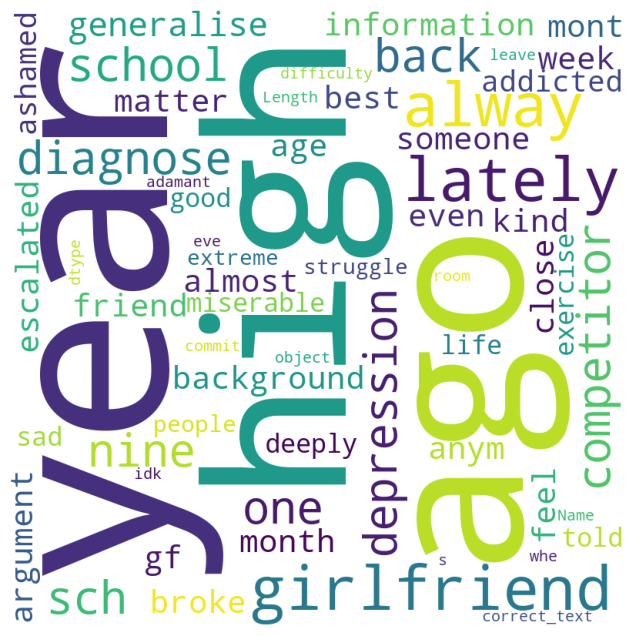

In [211]:
g = str(df_final[df_final[0]== 1]['correct_text'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(g)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()


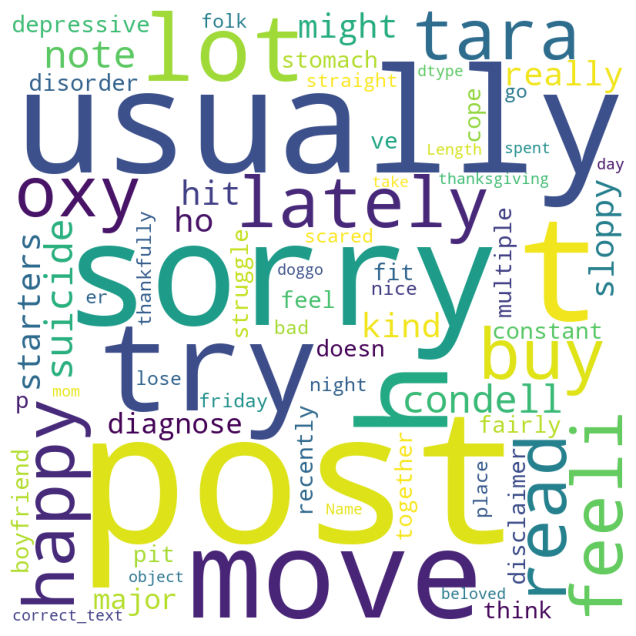

In [213]:
g = str(df_final[df_final[0]== 0]['correct_text'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(g)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()


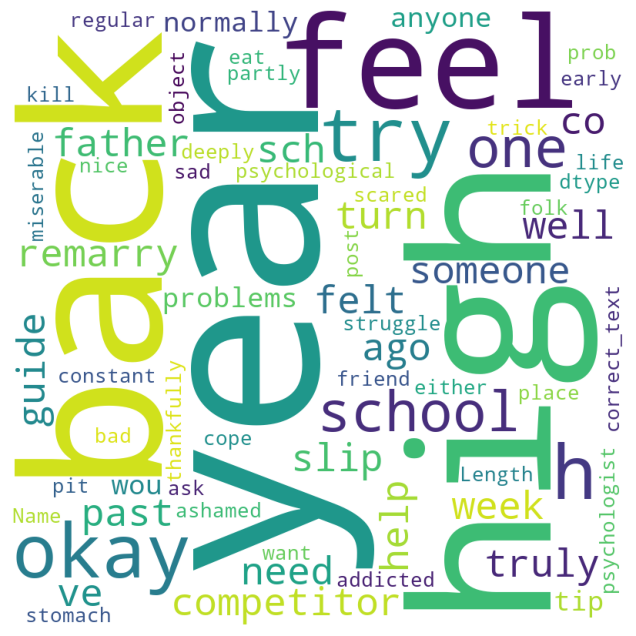

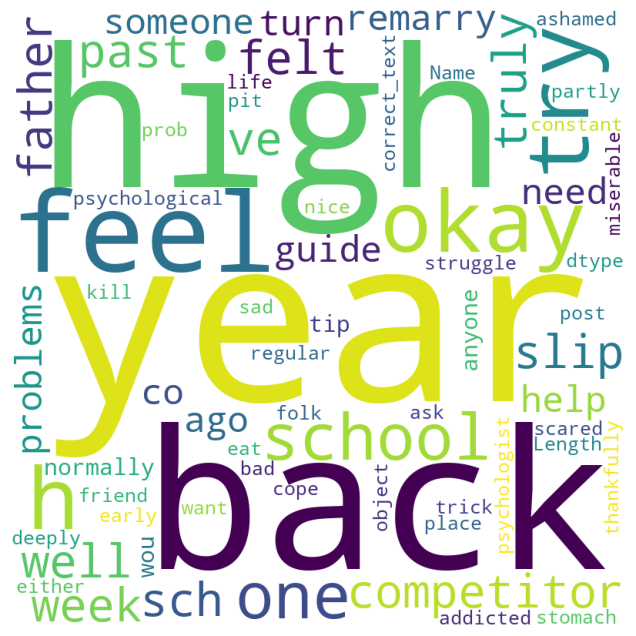

In [214]:
g = str(df_final[df_final[1]== 0]['correct_text'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(g)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

g = str(df_final[df_final[1]== 0]['correct_text'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(g)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

Since,not much diference is noticed,we go ahead with the training than plotting for each label

In [216]:
final_data = df_final.drop(columns=['post_title','post_text','annotations' ,'cleaned_text', 'word_count', 'char_count'])

In [217]:
final_data

correct_text  0  1  2  3  4  5  6  \
0     high school year back, one high competitor sch...  1  0  1  1  0  0  0   
1     nine year ago diagnose depression generalise a...  1  1  0  0  1  0  0   
2     background information: gf almost 3 year broke...  1  1  1  1  0  0  1   
3     girlfriend ,of 3 month ,has best friend 8 mont...  1  1  0  0  0  0  1   
4     i'm alway feel like this. even matter age anym...  1  1  0  0  0  0  0   
...                                                 ... .. .. .. .. .. .. ..   
1998  addicted, ashamed, miserable, deeply sad life....  1  0  0  0  0  0  0   
1999  i'm always told exercise good people struggle ...  1  1  0  1  0  0  0   
2000  lately i've extreme difficulty leave room. eve...  1  1  0  0  0  0  0   
2001  idk do. girlfriend adamant lately whe commit s...  1  1  1  0  0  0  1   
2002  thanksgiving spent day mom take beloved doggo ...  0  1  0  0  0  0  0   

      7  8  
0     0  0  
1     0  0  
2     0  0  
3     0  0  
4     0  0  
...  .. ..  
1998  0  0  
1999  0  0  
2000  1  0  
2001  0  0  
2002  0  0  

[2003 rows x 10 columns]

BUILDING VOCALBULARY

In [218]:
# load doc and add to vocab
def build_vocab(vocab_obj, text):
    sample = text
    tokens = [word for word in sample.split()]
    vocab_obj.update(tokens)

def save__vocab_list(vocab, filename):
    lines = [a for a in vocab.keys()]
    # convert lines to a single blob of text
    data = '\n'.join(lines)
    # open file
    file = open(filename, 'w', encoding="utf-8")
    # write text
    file.write(data)
    # close file
    file.close()


In [219]:
vocab = Counter()
for text in final_data['correct_text']:
    build_vocab(vocab, text)

In [226]:
print(vocab.most_common(50))

[('feel', 4144), ('get', 3462), ('like', 3400), ("i'm", 3072), ('want', 2715), ('know', 2519), ('go', 2490), ('i’m', 2055), ('make', 1819), ('even', 1677), ('really', 1598), ('try', 1483), ('time', 1429), ('think', 1351), ('don’t', 1327), ('thing', 1297), ('help', 1292), ('year', 1248), ('say', 1220), ("i've", 1211), ('one', 1176), ('life', 1167), ('would', 1151), ('friend', 1100), ('me.', 1068), ('talk', 1055), ('start', 1050), ('take', 1043), ('people', 1012), ('never', 987), ('depression', 969), ('need', 947), ('day', 912), ('bad', 902), ('i’ve', 898), ('work', 897), ('see', 876), ("can't", 851), ('much', 846), ('always', 811), ('it.', 733), ('well', 724), ('love', 716), ('back', 706), ('thought', 705), ('tell', 683), ('still', 678), ('it’s', 670), ('could', 658), ('since', 655)]


In [225]:
print(vocab.most_common()[25:75])


[('talk', 1055), ('start', 1050), ('take', 1043), ('people', 1012), ('never', 987), ('depression', 969), ('need', 947), ('day', 912), ('bad', 902), ('i’ve', 898), ('work', 897), ('see', 876), ("can't", 851), ('much', 846), ('always', 811), ('it.', 733), ('well', 724), ('love', 716), ('back', 706), ('thought', 705), ('tell', 683), ('still', 678), ('it’s', 670), ('could', 658), ('since', 655), ('come', 645), ('good', 638), ('told', 634), ('anything', 631), ('something', 631), ('every', 624), ('also', 607), ('way', 588), ('give', 585), ('keep', 583), ('last', 578), ('can’t', 563), ('someone', 563), ('everything', 550), ('end', 550), ('anyone', 549), ('lot', 501), ('month', 498), ('im', 492), ('seem', 489), ('lose', 489), ('find', 489), ('look', 487), ('family', 475), ('hard', 468)]


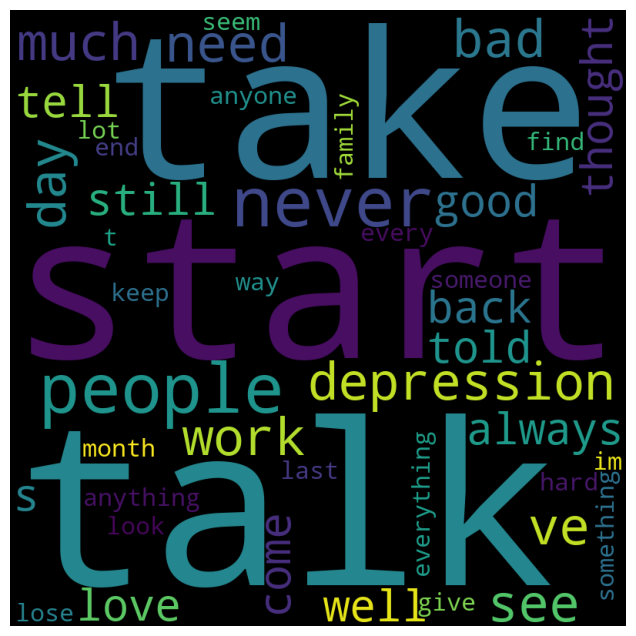

In [234]:
g = " ".join([x[0] for x in vocab.most_common()[25:75]])

wordcloud = WordCloud(width = 800, height = 800, background_color ='black', min_font_size = 10).generate(g)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

In [228]:
save__vocab_list(vocab, 'vocab.txt')

MOEDL BUILDING

In [256]:
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)
    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

#  define the model
def define_model(vocab_size, max_length, n_words):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Flatten(input_shape=(n_words,)))
    model.add(Dense(45, activation='relu'))
    model.add(Dense(9, activation='sigmoid'))
    optimizer = Adam(0.0001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    return model


In [257]:
X = final_data['correct_text']
y = final_data[[0, 1, 2, 3, 4, 5, 6, 7, 8]]


In [277]:
new_column_names = ['correct_text','Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down','Feeling-down-depressed-or-hopeless','Feeling-tired-or-having-little-energy','Little-interest-or-pleasure-in-doing','Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual','Poor-appetite-or-overeating','Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way','Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television','Trouble-falling-or-staying-asleep-or-sleeping-too-much']
final_data.set_axis(new_column_names, axis=1)


correct_text  \
0     high school year back, one high competitor sch...   
1     nine year ago diagnose depression generalise a...   
2     background information: gf almost 3 year broke...   
3     girlfriend ,of 3 month ,has best friend 8 mont...   
4     i'm alway feel like this. even matter age anym...   
...                                                 ...   
1998  addicted, ashamed, miserable, deeply sad life....   
1999  i'm always told exercise good people struggle ...   
2000  lately i've extreme difficulty leave room. eve...   
2001  idk do. girlfriend adamant lately whe commit s...   
2002  thanksgiving spent day mom take beloved doggo ...   

      Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down  \
0                                                     1                                               
1                                                     1                                               
2                                                     1                                               
3                                                     1                                               
4                                                     1                                               
...                                                 ...                                               
1998                                                  1                                               
1999                                                  1                                               
2000                                                  1                                               
2001                                                  1                                               
2002                                                  0                                               

      Feeling-down-depressed-or-hopeless  \
0                                      0   
1                                      1   
2                                      1   
3                                      1   
4                                      1   
...                                  ...   
1998                                   0   
1999                                   1   
2000                                   1   
2001                                   1   
2002                                   1   

      Feeling-tired-or-having-little-energy  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   
...                                     ...   
1998                                      0   
1999                                      0   
2000                                      0   
2001                                      1   
2002                                      0   

      Little-interest-or-pleasure-in-doing  \
0                                        1   
1                                        0   
2                                        1   
3                                        0   
4                                        0   
...                                    ...   
1998                                     0   
1999                                     1   
2000                                     0   
2001                                     0   
2002                                     0   

      Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual  \
0                                                     0                                                                                                                       
1                                                     1                                             

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [259]:
X_train.fillna(" ", axis=0, inplace=True)
X_test.fillna(" ", axis=0, inplace=True)
y_train.fillna(0.0, inplace=True)
y_test.fillna(1.0, inplace=True)

In [260]:
from tensorflow.keras.preprocessing.text import Tokenizer

vocab_set = set([x for x in vocab if len(x)>2])

tokenizer = create_tokenizer(X_train.values)
vocab_size = len(tokenizer.word_index) + 1
max_length = max([len(s.split()) for s in X_train])

In [261]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = encode_docs(tokenizer, max_length, X_train.values)
x_test = encode_docs(tokenizer, max_length, X_test.values)

In [262]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


clf_model = define_model(vocab_size, max_length, x_train.shape[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1203, 100)         1111900   
                                                                 
 flatten_3 (Flatten)         (None, 120300)            0         
                                                                 
 dense_4 (Dense)             (None, 45)                5413545   
                                                                 
 dense_5 (Dense)             (None, 9)                 414       
                                                                 
Total params: 6525859 (24.89 MB)
Trainable params: 6525859 (24.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [263]:
clf_model.fit(x_train, y_train.values, epochs=10, verbose=2, batch_size=74)

Epoch 1/10


22/22 - 2s - loss: 0.5446 - accuracy: 0.7959 - 2s/epoch - 73ms/step
Epoch 2/10
22/22 - 1s - loss: 0.5097 - accuracy: 0.7990 - 808ms/epoch - 37ms/step
Epoch 3/10
22/22 - 1s - loss: 0.5009 - accuracy: 0.4863 - 760ms/epoch - 35ms/step
Epoch 4/10
22/22 - 1s - loss: 0.4973 - accuracy: 0.6866 - 746ms/epoch - 34ms/step
Epoch 5/10
22/22 - 1s - loss: 0.4970 - accuracy: 0.5855 - 733ms/epoch - 33ms/step
Epoch 6/10
22/22 - 1s - loss: 0.4932 - accuracy: 0.2609 - 736ms/epoch - 33ms/step
Epoch 7/10
22/22 - 1s - loss: 0.4908 - accuracy: 0.5031 - 724ms/epoch - 33ms/step
Epoch 8/10
22/22 - 1s - loss: 0.4890 - accuracy: 0.6511 - 747ms/epoch - 34ms/step
Epoch 9/10
22/22 - 1s - loss: 0.4849 - accuracy: 0.3995 - 752ms/epoch - 34ms/step
Epoch 10/10
22/22 - 1s - loss: 0.4813 - accuracy: 0.7116 - 794ms/epoch - 36ms/step


In [264]:
clf_model.evaluate(x_train, y_train, verbose=0)[1]

0.22784020006656647

In [265]:
clf_model.evaluate(x_test, y_test, verbose=0)[1]

0.14214463531970978

In [266]:
clf_model.predict(x_test[0].reshape(1,-1))[0,0]

1/1 [==============================] - 0s 88ms/step


0.8547991

In [279]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = clf_model.predict(x_test)


y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = np.mean(y_pred_classes == np.argmax(y_test, axis=1)) 

print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))  

auc_roc = roc_auc_score(y_test, y_pred, multi_class='ovr')

print(f"\nAccuracy: {accuracy}")
print(f"AUC-ROC: {auc_roc}")


13/13 [==============================] - 0s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.01      0.02       342
           1       0.13      0.98      0.24        54
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.14       401
   macro avg       0.16      0.20      0.05       401
weighted avg       0.59      0.14      0.05       401


Accuracy: 0.14214463840399003
AUC-ROC: 0.5746007698535656


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [272]:
def predict_sentiment_for_labels(text, vocab=vocab_set, tokenizer=tokenizer, max_length=max_length, model=clf_model):
    predictions = {}
    line = text

    line = clean_text(line)
    line = correct_text(line)
    line = " ".join([word for word in line.split() if word in vocab])
    padded = encode_docs(tokenizer, max_length, [line])
    
 
    for label in range(9):
        yhat = model.predict(padded, verbose=0)
        percent_pos = yhat[0, label]
        predicted_label = 1 if percent_pos >= 0.5 else 0
        predictions[label] = predicted_label
    return predictions

# example usage
text = final_data['correct_text'][200]
predictions = predict_sentiment_for_labels(text)
print(predictions)


{0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}


MODEL SAVING

In [273]:
#will be saved in cwd
with open('result.txt', 'w') as f: [f.write(f"{{\n{key}: {value}\n}}\n") for key, value in predictions.items()]
